<a href="https://colab.research.google.com/github/nalika/ESOF3675/blob/main/ESOF_3675_Group_Project_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('drive')



Mounted at drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

print("Train data has: ", train.shape)
print("Test data has: ",test.shape)

Train data has:  (1460, 81)
Test data has:  (1459, 80)


In [ ]:

train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


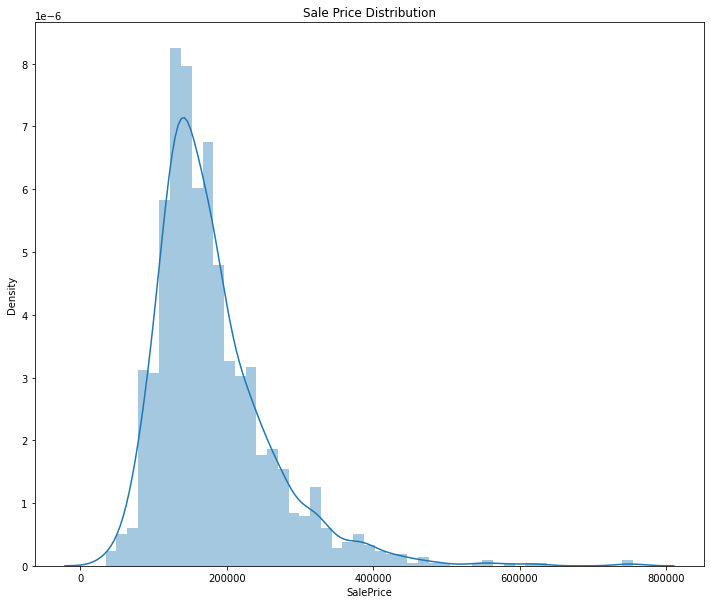

In [ ]:
fig,ax = plt.subplots(figsize=(12,10))
dist=sns.distplot(train['SalePrice'])
dist.set_title('Sale Price Distribution')
plt.show()
fig.savefig('SPdist',dpi=100)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


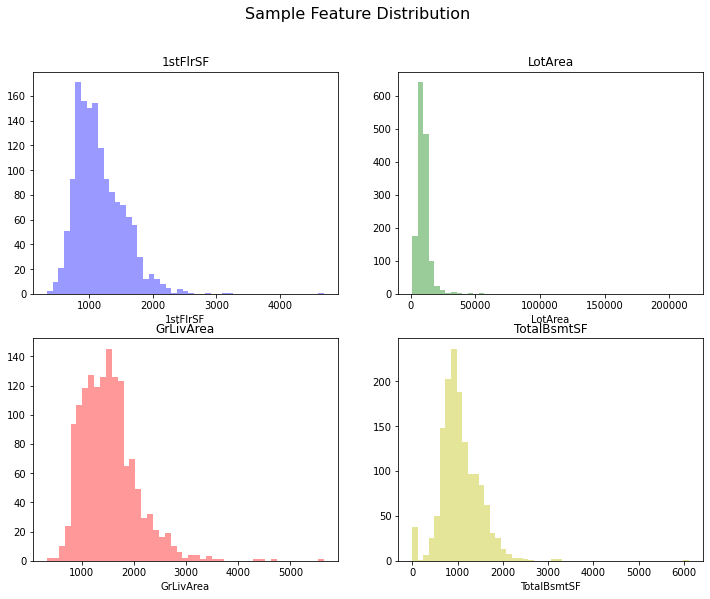

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(12,9))

sns.distplot(train['1stFlrSF'], kde=False, color="b", ax=axs[0, 0])
axs[0, 0].set_title('1stFlrSF')
sns.distplot(train['LotArea'], kde=False, color="g", ax=axs[0, 1])
axs[0, 1].set_title('LotArea')
sns.distplot(train['GrLivArea'], kde=False, color="r", ax=axs[1, 0])
axs[1, 0].set_title('GrLivArea')
sns.distplot(train['TotalBsmtSF'], kde=False, color="y", ax=axs[1, 1])
axs[1, 1].set_title('TotalBsmtSF')
fig.suptitle('Sample Feature Distribution', fontsize=16)


fig.savefig('SampleFeatDist',dpi=100)

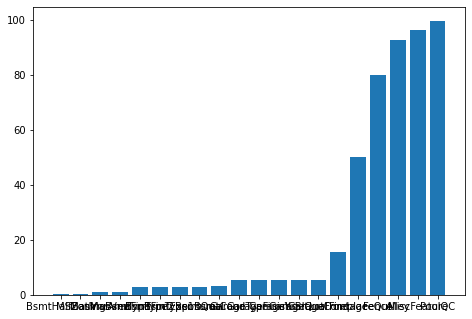

In [ ]:
#show missing percentage of values
percent_missing = test.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': test.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(missing_value_df.tail(20)['column_name'], missing_value_df.tail(20)['percent_missing'])
plt.show()





In [ ]:
combine_df_wSalePrice = pd.concat([train, test], axis=0)
#combine_df_wSalePrice= combine_df_wSalePrice.drop(['Id'], axis=1)
combine_df_wSalePrice.shape

(2919, 81)

In [ ]:
#combine_df_wSalePrice=train
#combine_df_wSalePrice.shape

In [ ]:
#Look at correlations before data processing
corrfeat= combine_df_wSalePrice.corr()

In [ ]:
#show missing percentage of values before preprocessing
percent_missing = combine_df_wSalePrice.isnull().sum() * 100 / len(combine_df_wSalePrice)
missing_value_df = pd.DataFrame({'column_name': combine_df_wSalePrice.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

display(missing_value_df.tail(50))


,column_name,percent_missing
LotShape,LotShape,0.000000
LandSlope,LandSlope,0.000000
Condition1,Condition1,0.000000
Condition2,Condition2,0.000000
BldgType,BldgType,0.000000
HouseStyle,HouseStyle,0.000000
OverallQual,OverallQual,0.000000
YearBuilt,YearBuilt,0.000000
YearRemodAdd,YearRemodAdd,0.000000
RoofStyle,RoofStyle,0.000000


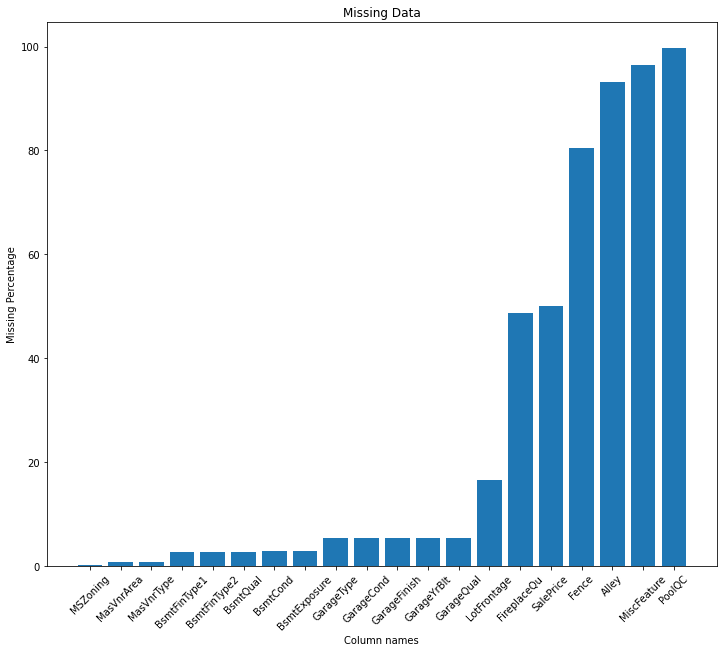

In [ ]:
fig,ax = plt.subplots(figsize=(12,10))

ax.bar(missing_value_df.tail(20)['column_name'], missing_value_df.tail(20)['percent_missing'])
plt.xticks(rotation=45)
plt.xlabel('Column names')
plt.ylabel('Missing Percentage')
plt.title('Missing Data')
plt.show()

fig.savefig('missingdataGraph',dpi=100)

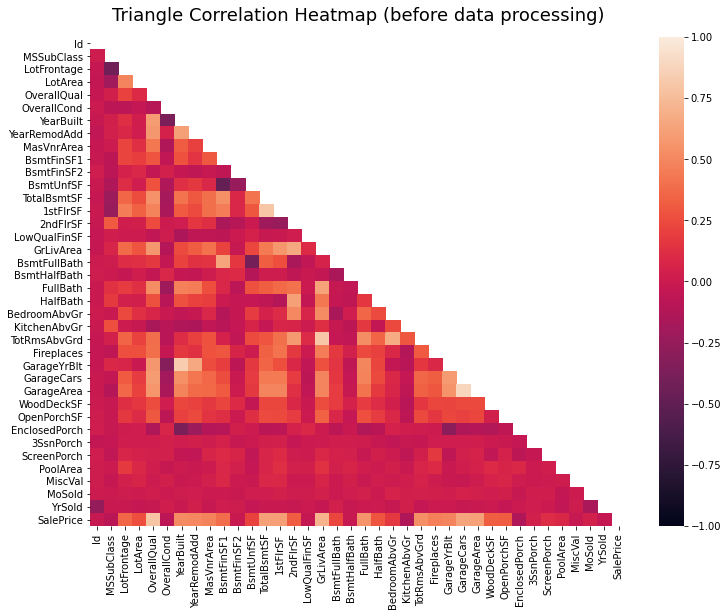

In [ ]:
f, ax1 = plt.subplots(figsize=(12,9))
mask = np.triu(np.ones_like(corrfeat, dtype=np.bool))
heatmap = sns.heatmap(corrfeat, mask=mask, vmin=-1, vmax=1)
heatmap.set_title('Triangle Correlation Heatmap (before data processing)', fontdict={'fontsize':18}, pad=16);
f.savefig('TCorr',dpi=100)

In [ ]:
top_feature = corrfeat.index[abs(corrfeat['SalePrice']>0.5)]

NameError: ignored

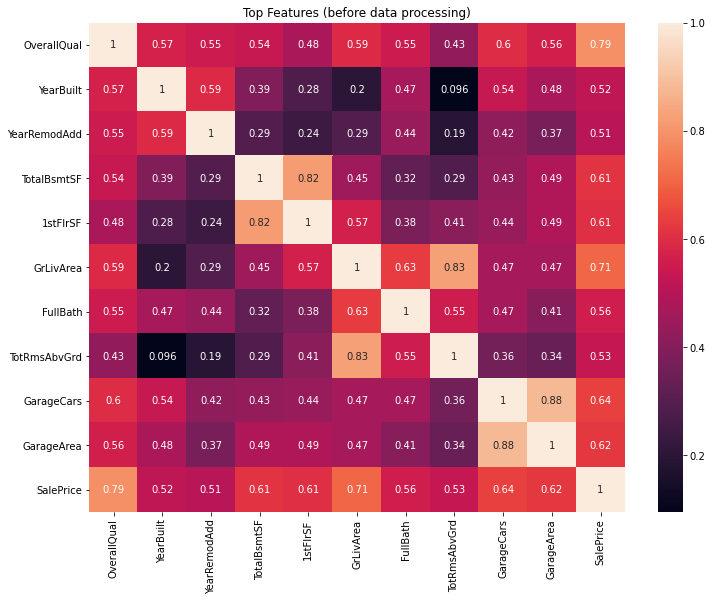

In [ ]:
f, ax1 = plt.subplots(figsize=(12,9))
top_corr = train[top_feature].corr()
hm=sns.heatmap(top_corr, annot=True, vmax=1)
hm.set_title('Top Features (before data processing)')
plt.show()
f.savefig('topFeatbefore',dpi=100)

In [ ]:
df_combined = pd.concat([train.drop(['SalePrice'], axis=1), test], axis=0)
df_combined.shape

(2919, 80)

In [ ]:

"Visit again !"


#df_combined = train.drop(['SalePrice'],axis=1)
#df_combined.shape






'Visit again !'

In [ ]:
#test processing remove later
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [ ]:
df_combined.isnull().sum().head(50)

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
Alley           2721
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [ ]:
df_combined.isnull().sum().tail(32)

BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu      1420
GarageType        157
GarageYrBlt       159
GarageFinish      159
GarageCars          1
GarageArea          1
GarageQual        159
GarageCond        159
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           2909
Fence            2348
MiscFeature      2814
MiscVal             0
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
dtype: int64

In [ ]:
df_combined["LotFrontage"]

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
1454     21.0
1455     21.0
1456    160.0
1457     62.0
1458     74.0
Name: LotFrontage, Length: 2919, dtype: float64

**Data Preprocessing** 

Deal with Missing Values from above


In [ ]:

# LotFrontage : we can fill in missing values by the mean LotFrontage of the neighborhood.
df_combined["LotFrontage"] = df_combined.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))
df_combined.shape

(2919, 80)

In [ ]:
# categorical feature, use mode: NA = No Alley Access
df_combined["Alley"] = df_combined["Alley"].fillna("None")

In [ ]:
# categorical feature, use mode
df_combined['Exterior1st'] = df_combined['Exterior1st'].fillna(df_combined['Exterior1st'].mode()[0])
df_combined['Exterior2nd'] = df_combined['Exterior2nd'].fillna(df_combined['Exterior2nd'].mode()[0])

In [ ]:
# MSZoning: since its categorical, use mode
df_combined['MSZoning'] = df_combined['MSZoning'].fillna(df_combined['MSZoning'].mode()[0])

In [ ]:
# for the following features, we can consider null values as not having basements (NONE)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_combined[col] = df_combined[col].fillna('None')

In [ ]:
# for these numerical features, null values mean no basements so convert numerical to 0
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_combined[col] = df_combined[col].fillna(0)

In [ ]:
# NA mean no fireplace so quality can be NONE
df_combined['FireplaceQu'] = df_combined['FireplaceQu'].fillna('None')

In [ ]:
# for these columns, NA = No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_combined[col] = df_combined[col].fillna('None')

In [ ]:
# NA = no pool
df_combined['PoolQC'] = df_combined['PoolQC'].fillna('None')

In [ ]:
# NA = no fence
df_combined['Fence'] = df_combined['Fence'].fillna('None')

In [ ]:
#Misc Feature, NA = None
df_combined['MiscFeature'] = df_combined['MiscFeature'].fillna('None')

In [ ]:
# NA replace with with the mode
df_combined["MasVnrType"] = df_combined["MasVnrType"].fillna(df_combined['MasVnrType'].mode()[0])
df_combined["MasVnrArea"] = df_combined["MasVnrArea"].fillna(df_combined['MasVnrArea'].mode()[0])

In [ ]:
# NA replace with mode
df_combined['Utilities'] = df_combined['Utilities'].fillna(df_combined['Utilities'].mode()[0])

In [ ]:
# NA: fill with mode
df_combined['Electrical'] = df_combined['Electrical'].fillna(df_combined['Electrical'].mode()[0])

In [ ]:
# substitute NA value with mode
df_combined['KitchenQual'] = df_combined['KitchenQual'].fillna(df_combined['KitchenQual'].mode()[0])

In [ ]:
# use mode again
df_combined['Functional'] = df_combined['Functional'].fillna(df_combined['Functional'].mode()[0])

In [ ]:
# since NA for garage means no garage, NA value for this column is set to zero
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_combined[col] = df_combined[col].fillna(0)

In [ ]:
# fill missing with mode
df_combined['SaleType'] = df_combined['SaleType'].fillna(df_combined['SaleType'].mode()[0])

In [ ]:
# check if all missing values are gone
df_combined.isnull().sum().sum()

0

In [ ]:
df_combined.shape

(2919, 80)

,column_name,percent_missing
EnclosedPorch,EnclosedPorch,0.0
OpenPorchSF,OpenPorchSF,0.0
WoodDeckSF,WoodDeckSF,0.0
PavedDrive,PavedDrive,0.0
GarageCond,GarageCond,0.0
GarageQual,GarageQual,0.0
GarageArea,GarageArea,0.0
3SsnPorch,3SsnPorch,0.0
HeatingQC,HeatingQC,0.0
Heating,Heating,0.0


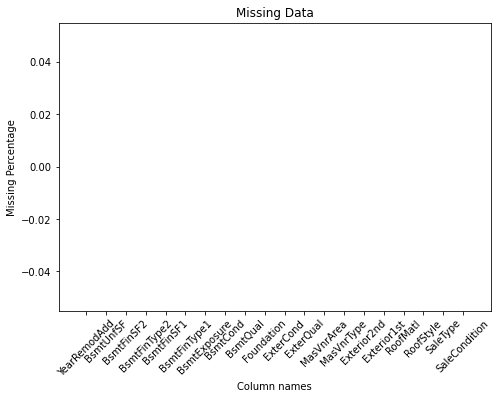

In [ ]:
#show missing percentage of values
percent_missing = df_combined.isnull().sum() * 100 / len(df_combined)
missing_value_df = pd.DataFrame({'column_name': df_combined.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

display(missing_value_df.tail(50))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(missing_value_df.tail(20)['column_name'], missing_value_df.tail(20)['percent_missing'])
plt.xticks(rotation=45)
plt.xlabel('Column names')
plt.ylabel('Missing Percentage')
plt.title('Missing Data')
plt.show()
fig.savefig('MissingDataafter',dpi=100)


In [ ]:
# Some columns that are numerical that should be considered
# as categorical

# MSSubClass = The building class
df_combined['MSSubClass'] = df_combined['MSSubClass'].astype(str)


#Changing OverallCond into a categorical variable
df_combined['OverallCond'] = df_combined['OverallCond'].astype(str)
df_combined['OverallQual'] = df_combined['OverallQual'].astype(str)

In [ ]:
df_combined.shape

(2919, 80)

In [ ]:
#Fixing Skewness
from scipy.stats import skew
numeric_feats =  df_combined.dtypes[ df_combined.dtypes != "object"].index

In [ ]:
skewed_feats = df_combined[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_feats

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
MasVnrArea        2.613592
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
LotFrontage       1.460429
BsmtFinSF1        1.425230
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
BedroomAbvGr      0.326324
GarageArea        0.239257
MoSold            0.195884
FullBath          0.167606
YrSold            0.132399
Id                0.000000
GarageCars       -0.219581
YearRemodAdd     -0.451020
YearBuilt        -0.599806
GarageYrBlt      -3.906205
dtype: float64

In [ ]:
## Fixing Skewed features using boxcox transformation. 
def fixing_skewness(df):
    """
    This function takes in a dataframe and return fixed skewed dataframe
    """
    ## Import necessary modules 
    from scipy.stats import skew
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    ## Getting all the data that are not of "object" type. 
    numeric_feats = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index

    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))

fixing_skewness(df_combined)
#https://www.kaggle.com/masumrumi/a-detailed-regression-guide-with-house-pricing
#https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


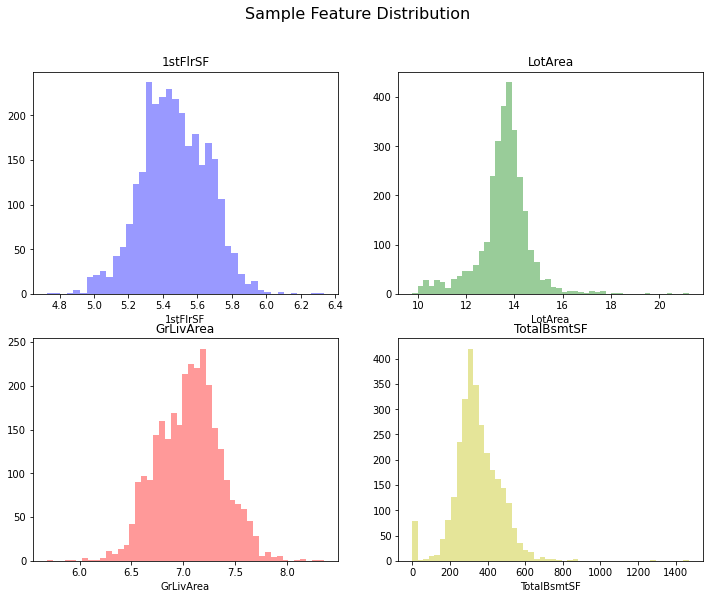

In [ ]:

fig, axs = plt.subplots(2,2,figsize=(12,9))

sns.distplot(df_combined['1stFlrSF'], kde=False, color="b", ax=axs[0, 0])
axs[0, 0].set_title('1stFlrSF')
sns.distplot(df_combined['LotArea'], kde=False, color="g", ax=axs[0, 1])
axs[0, 1].set_title('LotArea')
sns.distplot(df_combined['GrLivArea'], kde=False, color="r", ax=axs[1, 0])
axs[1, 0].set_title('GrLivArea')
sns.distplot(df_combined['TotalBsmtSF'], kde=False, color="y", ax=axs[1, 1])
axs[1, 1].set_title('TotalBsmtSF')
fig.suptitle('Sample Feature Distribution', fontsize=16)


fig.savefig('FixedFeatDist',dpi=100)
#https://www.statisticshowto.com/box-cox-transformation/#:~:text=A%20Box%20Cox%20transformation%20is,a%20broader%20number%20of%20tests.

In [ ]:
df_combined

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,15.086530,13.424521,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,3.035140e+51,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,19.378554,Gd,TA,PConc,Gd,TA,No,GLQ,117.855851,Unf,0.0,30.016555,296.832293,GasA,Ex,Y,SBrkr,5.318379,1019.540835,0.0,7.234115,0.992784,0.00000,2,1.069352,3,0.75096,Gd,2.238463,Typ,0.000000,None,Attchd,8.440326e+56,RFn,2.0,548.0,TA,TA,Y,0.000000,12.009559,0.000000,0.0,0.0,0.0,None,None,None,0.000000,2,2008,WD,Normal
1,2,20,RL,16.999618,13.694528,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,2.444449e+51,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,146.805782,Unf,0.0,44.178889,407.302361,GasA,Ex,Y,SBrkr,5.550627,0.000000,0.0,6.947211,0.000000,0.71081,2,0.000000,3,0.75096,TA,1.978208,Typ,0.900816,TA,Attchd,6.646173e+56,RFn,2.0,460.0,TA,TA,Y,56.339214,0.000000,0.000000,0.0,0.0,0.0,None,None,None,0.000000,5,2007,WD,Normal
2,3,60,RL,15.484626,14.034134,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2.987167e+51,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,17.721066,Gd,TA,PConc,Gd,TA,Mn,GLQ,91.575275,Unf,0.0,56.957796,314.805018,GasA,Ex,Y,SBrkr,5.362015,1034.306521,0.0,7.275132,0.992784,0.00000,2,1.069352,3,0.75096,Gd,1.978208,Typ,0.900816,TA,Attchd,8.293147e+56,RFn,2.0,608.0,TA,TA,Y,0.000000,9.849185,0.000000,0.0,0.0,0.0,None,None,None,0.000000,9,2008,WD,Normal
3,4,70,RL,14.403230,13.683422,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1.482522e+51,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,52.776363,Unf,0.0,64.881737,268.234256,GasA,Gd,Y,SBrkr,5.388291,899.200621,0.0,7.237969,0.992784,0.00000,1,0.000000,3,0.75096,Gd,2.116352,Typ,0.900816,Gd,Detchd,8.076909e+56,Unf,3.0,642.0,TA,TA,Y,0.000000,8.921747,16.012023,0.0,0.0,0.0,None,None,None,0.000000,2,2006,WD,Abnorml
4,5,60,RL,17.480328,14.550143,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2.963447e+51,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,25.323122,Gd,TA,PConc,Gd,TA,Av,GLQ,112.040313,Unf,0.0,61.233859,376.259314,GasA,Ex,Y,SBrkr,5.493032,1265.167836,0.0,7.470740,0.992784,0.00000,2,1.069352,4,0.75096,Gd,2.347900,Typ,0.900816,TA,Attchd,8.220468e+56,RFn,3.0,836.0,TA,TA,Y,42.351296,14.180239,0.000000,0.0,0.0,0.0,None,None,None,0.000000,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,7.679567,10.503898,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,2.328726e+51,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000000,TA,TA,CBlock,TA,TA,No,Unf,0.000000,Unf,0.0,65.309795,205.682475,GasA,Gd,Y,SBrkr,5.041055,643.029827,0.0,6.810355,0.000000,0.00000,1,1.069352,3,0.75096,TA,1.819119,Typ,0.000000,None,None,0.000000e+00,None,0.0,0.0,None,None,Y,0.000000,0.000000,0.000000,0.0,0.0,0.0,None,None,None,0.000000,6,2006,WD,Normal
1455,2916,160,RM,7.6

In [ ]:
def Removal_Outliers(train_features,features_names):
  for name in features_names:
     print(name) 
     Q1=train_features[name].quantile(0.25)
     Q3=train_features[name].quantile(0.75)
     IQR=Q3-Q1
     Lower_Whisker = Q1-1.3*IQR
     Upper_Whisker = Q3+1.3*IQR
     train_features = train_features[train_features[name] < Upper_Whisker]
     train_features = train_features[train_features[name] > Lower_Whisker]

  return train_features

In [ ]:
combined_dummies = df_combined.drop(['Id'], axis=1)
combined_dummies = pd.get_dummies(df_combined)

# from sklearn.preprocessing import LabelEncoder
# combine_df = combine_df.apply(LabelEncoder().fit_transform)


In [ ]:
df_combined.shape

(2919, 80)

In [ ]:
combined_dummies.shape

(2919, 335)

In [ ]:
y = train['SalePrice'].values

In [ ]:
combined_dummies

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,15.086531,13.424520,3.035229e+51,2003,19.153100,117.855863,0.0,30.016554,296.832332,5.318379,1019.567317,0.0,7.234115,0.992784,0.00000,2,1.069352,3,0.753422,2.238462,0.000000,8.440389e+56,2.0,548.0,0.000000,12.009558,0.000000,0.0,0.0,0.0,0.000000,2,2008,55.633306,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,16.999619,13.694527,2.444521e+51,1976,0.000000,146.805798,0.0,44.178886,407.302419,5.550627,0.000000,0.0,6.947212,0.000000,0.71081,2,0.000000,3,0.753422,1.978208,0.900816,6.646223e+56,2.0,460.0,56.306584,0.000000,0.000000,0.0,0.0,0.0,0.000000,5,2007,31.888714,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,15.484626,14.034133,2.987255e+51,2002,17.521987,91.575284,0.0,56.957793,314.805061,5.362015,1034.333450,0.0,7.275132,0.992784,0.00000,2,1.069352,3,0.753422,1.978208,0.900816,8.293208e+56,2.0,608.0,0.000000,9.849185,0.000000,0.0,0.0,0.0,0.000000,9,2008,56.281055,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,14.403230,13.683421,1.482566e+51,1970,0.000000,52.776367,0.0,64.881733,268.234291,5.388291,899.223486,0.0,7.237969,0.992784,0.00000,1,0.000000,3,0.753422,2.116352,0.900816,8.076970e+56,3.0,642.0,0.000000,8.921746,15.542141,0.0,0.0,0.0,0.000000,2,2006,52.575527,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,17.480329,14.550142,2.963535e+51,2000,24.997544,112.040325,0.0,61.233855,376.259367,5.493032,1265.201886,0.0,7.470741,0.992784,0.00000,2,1.069352,4,0.753422,2.347900,0.900816,8.220529e+56,3.0,836.0,42.328830,14.180238,0.000000,0.0,0.0,0.0,0.000000,12,2008,61.716792,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,7.679568,10.503897,2.328795e+51,1970,0.000000,0.000000,0.0,65.309791,205.682501,5.041055,643.045242,0.0,6.810355,0.000000,0.00000,1,1.069352,3,0.753422,1.819119,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,6,2006,45.214705,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1455,2916,7.679568,10.463055,2.328795e+51,1970,0.000000,58.629117,0.0,45.107590,205.682501,5.041055,643.045242,0.0,6.810355,0.000000,0.00000,1,1.069352,3,0.753422,1.978208,0.000000,6.299681e+56,1.0,286.0,0.000000,7.235575,0.000000,0.0,0.0,0.0,0.000000,4,2006,45.214705,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1456,2917,25.132418,15.304040,2.147256e+51,1996,0.000000,170.730556,0.0,0.000000,397.281519,5.532572,0.000000,

In [ ]:
result = combined_dummies.values

In [ ]:
result

array([[1.00000000e+00, 1.50865308e+01, 1.34245202e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 1.69996191e+01, 1.36945268e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.54846264e+01, 1.40341329e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [2.91700000e+03, 2.51324179e+01, 1.53040403e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.91800000e+03, 1.46796594e+01, 1.38737864e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.91900000e+03, 1.62566691e+01, 1.37005019e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
result = scaler.fit_transform(result)

In [ ]:
result

array([[-1.73145754, -0.1597651 , -0.12527155, ..., -0.12653513,
         0.46393674, -0.30269297],
       [-1.7302708 ,  0.52292708,  0.12706988, ..., -0.12653513,
         0.46393674, -0.30269297],
       [-1.72908405, -0.0177033 ,  0.44445737, ..., -0.12653513,
         0.46393674, -0.30269297],
       ...,
       [ 1.72908405,  3.42514447,  1.6312813 , ..., -0.12653513,
        -2.15546626, -0.30269297],
       [ 1.7302708 , -0.30495858,  0.29460149, ..., -0.12653513,
         0.46393674, -0.30269297],
       [ 1.73145754,  0.25780282,  0.13265412, ..., -0.12653513,
         0.46393674, -0.30269297]])

In [ ]:
#creating matrices for sklearn:
X = result[:train.shape[0]]
test_values = result[train.shape[0]:]


In [ ]:
y = train['SalePrice'].values

In [ ]:
# import train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#clf = LinearRegression()
clf= Lasso()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151334931811.09625, tolerance: 664823241.805396
  positive)


In [ ]:
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,2ndFlrSF,TotalSF
892,6.0,2.200275e+51,2003,353.063288,5.451569,6.789323,1,1.978208,1.0,264.0,0.000000,358.514857
1105,8.0,2.824882e+51,1995,459.416117,5.651898,7.636734,2,2.347900,2.0,712.0,1350.683092,1815.751108
413,5.0,1.637869e+51,1950,339.141981,5.428744,6.753188,1,1.819119,2.0,360.0,0.000000,344.570725
522,6.0,1.931046e+51,1950,338.044622,5.414588,7.208388,2,2.116352,2.0,420.0,781.779760,1125.238969
1036,9.0,3.133352e+51,2008,499.189223,5.696601,7.183100,2,1.978208,3.0,912.0,0.000000,504.885824
...,...,...,...,...,...,...,...,...,...,...,...,...
988,6.0,2.444521e+51,1976,294.568410,5.478843,7.395845,2,2.238462,2.0,551.0,1090.965603,1391.012855
243,6.0,2.524644e+51,1980,229.965142,5.126339,6.912881,1,1.978208,1.0,288.0,697.702729,932.794210
1342,8.0,3.011152e+51,2002,413.078157,5.560815,7.458233,2,2.116352,2.0,647.0,1057.698213,1476.337185
1057,7.0,2.824882e+51,1994,329.512079,5.399450,7.308331,2,2.116352,2.0,467.0,1040.460642,1375.372170


In [ ]:
from sklearn.metrics import r2_score

print("Train acc: " , r2_score(y_train, y_train_pred))
print("Test acc: ", r2_score(y_test, y_pred))

Train acc:  0.9411179923304475
Test acc:  0.8924168203505648


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics


print("Train acc: " , clf.score(X_train, y_train))
print("Test acc: ", clf.score(X_test, y_test))

Train acc:  0.9411179923304475
Test acc:  0.8924168203505649


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 17492.247231594043
Mean Squared Error: 753653422.2776357
Root Mean Squared Error: 27452.748902025014


In [ ]:
#Cross validation
from sklearn.model_selection import cross_validate
from sklearn import svm
from sklearn.metrics import make_scorer

cv_results = cross_validate(clf, X, y, cv=10)
sorted(cv_results.keys())
cv_results['test_score']


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237705215179.9686, tolerance: 852398977.1246127
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213728623235.09344, tolerance: 827439703.8697119
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238297839932.6319, tolerance: 829042909.2707292
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20181989736

array([0.88101857, 0.8711708 , 0.90724064, 0.77134883, 0.88696045,
       0.7155925 , 0.87313212, 0.89597262, 0.53115594, 0.88638827])

In [ ]:
print(cv_results['test_score'].mean())
print(cv_results['test_score'].std())


0.8219980736838082
0.11318014152015798


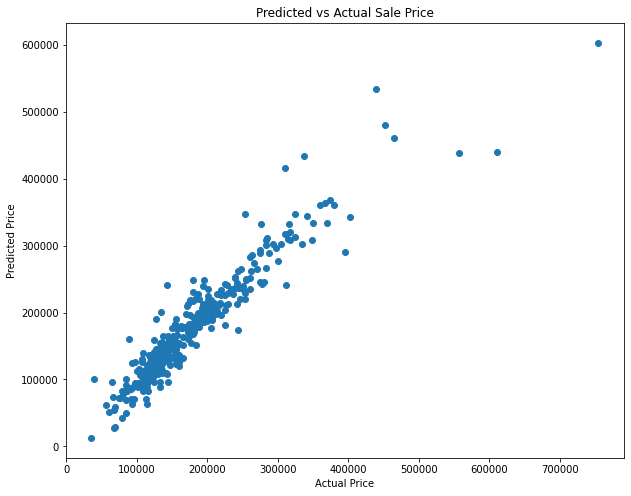

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))


plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title('Predicted vs Actual Sale Price')
fig.savefig('Reg_Iteration.png',dpi=100)

In [ ]:
test_values.shape

(1459, 335)

In [ ]:
final_labels = clf.predict(test_values)

In [ ]:
final_labels.shape

(1459,)

In [ ]:
new_results= pd.DataFrame({'Id':test['Id'],'SalePrice':final_labels})

In [ ]:
new_results.to_csv('submission_full.csv',index=False)

### Reduce overfitting





In [ ]:
def overfit_reducer(df):
    """
    This function takes in a dataframe and returns a list of features that are overfitted.
    """
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.5:
            overfit.append(i)
    overfit = list(overfit)
    return overfit


#https://www.kaggle.com/masumrumi/a-detailed-regression-guide-with-house-pricing

In [ ]:
df_combined.shape

(2919, 80)

In [ ]:
rev_overfit_df = df_combined

In [ ]:
overfitted_features = overfit_reducer(rev_overfit_df)

rev_overfit_df = rev_overfit_df.drop(overfitted_features, axis=1)
#X_sub = X_sub.drop(overfitted_features, axis=1)

In [ ]:
rev_overfit_df.shape

(2919, 76)

In [ ]:
rev_overfit_df = rev_overfit_df.drop(['Id'], axis=1)
rev_overfit_df = pd.get_dummies(rev_overfit_df)

In [ ]:
result = rev_overfit_df.values

In [ ]:
result.shape

(2919, 325)

In [ ]:
#creating matrices for sklearn:
X = result[:train.shape[0]]
test_values = result[train.shape[0]:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#clf = LinearRegression()
clf= Lasso()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205855842334.2449, tolerance: 664823241.805396
  positive)


In [ ]:
from sklearn.metrics import r2_score

print("Train acc: " , r2_score(y_train, y_train_pred))
print("Test acc: ", r2_score(y_test, y_pred))

Train acc:  0.9391342908524077
Test acc:  0.8878555546290029


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 17807.986400222617
Mean Squared Error: 785606498.3270186
Root Mean Squared Error: 28028.672789253127


In [ ]:
#Cross validation
from sklearn.model_selection import cross_validate
from sklearn import svm
from sklearn.metrics import make_scorer

cv_results = cross_validate(clf, X, y, cv=10)
sorted(cv_results.keys())
cv_results['test_score']

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 284995519717.6249, tolerance: 852398977.1246127
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285871088874.4255, tolerance: 827439703.8697119
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285906494541.43286, tolerance: 829042909.2707292
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24470568078

array([0.88679594, 0.92018532, 0.91152038, 0.76419709, 0.8883042 ,
       0.71153076, 0.87372759, 0.89563565, 0.64136344, 0.8826484 ])

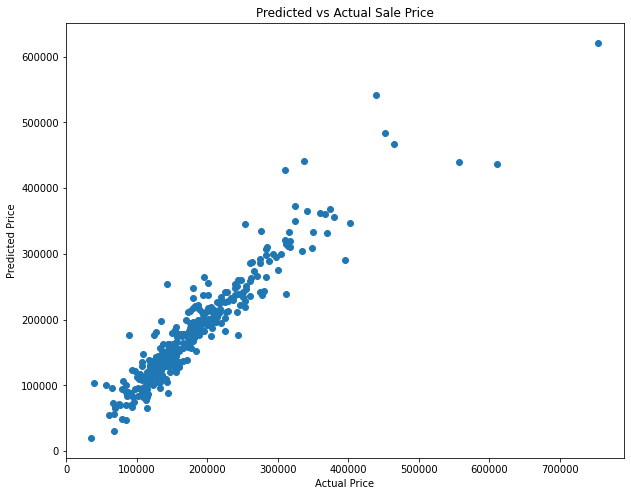

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))


plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title('Predicted vs Actual Sale Price')
fig.savefig('Reg_removed',dpi=100)

In [ ]:
cv_results = cross_validate(clf, X, y, cv=10)
sorted(cv_results.keys())
cv_results['test_score']


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 284995519717.6249, tolerance: 852398977.1246127
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285871088874.4255, tolerance: 827439703.8697119
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285906494541.43286, tolerance: 829042909.2707292
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24470568078

array([0.88679594, 0.92018532, 0.91152038, 0.76419709, 0.8883042 ,
       0.71153076, 0.87372759, 0.89563565, 0.64136344, 0.8826484 ])

In [ ]:
print(cv_results['test_score'].mean())
print(cv_results['test_score'].std())


0.8375908774691204
0.09152521147988658


In [ ]:
final_labels= clf.predict(test_values)

In [ ]:
test['Id']

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [ ]:
final_labels

array([130381.82927374, 171539.46384213, 195957.42270157, ...,
       178810.09410887, 117994.89963294, 216773.88687264])

In [ ]:
new_results= pd.DataFrame({'Id':test['Id'],'SalePrice':final_labels})

In [ ]:
new_results

,Id,SalePrice
0,1461,124839.142231
1,1462,167975.577247
2,1463,194286.629348
3,1464,196449.257760
4,1465,220445.512943
...,...,...
1454,2915,73992.226799
1455,2916,68410.310694
1456,2917,176240.487169
1457,2918,120704.270048


In [ ]:
new_results.to_csv('submission_reduced.csv',index=False)

**Top Correlated features only**

In [ ]:
df_house_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv',index_col=0)
df_house_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv',index_col=0)
df_house_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Remove the salePrices from training dataset3
#train_features = df_house_train.drop(['SalePrice'], axis=1)
train_features=df_house_train

In [ ]:
df_combined

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,15.086530,13.424521,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,3.035140e+51,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,19.378554,Gd,TA,PConc,Gd,TA,No,GLQ,117.855851,Unf,0.0,30.016555,296.832293,GasA,Ex,Y,SBrkr,5.318379,1019.540835,0.0,7.234115,0.992784,0.00000,2,1.069352,3,0.75096,Gd,2.238463,Typ,0.000000,None,Attchd,8.440326e+56,RFn,2.0,548.0,TA,TA,Y,0.000000,12.009559,0.000000,0.0,0.0,0.0,None,None,None,0.000000,2,2008,WD,Normal
1,2,20,RL,16.999618,13.694528,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,2.444449e+51,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,146.805782,Unf,0.0,44.178889,407.302361,GasA,Ex,Y,SBrkr,5.550627,0.000000,0.0,6.947211,0.000000,0.71081,2,0.000000,3,0.75096,TA,1.978208,Typ,0.900816,TA,Attchd,6.646173e+56,RFn,2.0,460.0,TA,TA,Y,56.339214,0.000000,0.000000,0.0,0.0,0.0,None,None,None,0.000000,5,2007,WD,Normal
2,3,60,RL,15.484626,14.034134,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2.987167e+51,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,17.721066,Gd,TA,PConc,Gd,TA,Mn,GLQ,91.575275,Unf,0.0,56.957796,314.805018,GasA,Ex,Y,SBrkr,5.362015,1034.306521,0.0,7.275132,0.992784,0.00000,2,1.069352,3,0.75096,Gd,1.978208,Typ,0.900816,TA,Attchd,8.293147e+56,RFn,2.0,608.0,TA,TA,Y,0.000000,9.849185,0.000000,0.0,0.0,0.0,None,None,None,0.000000,9,2008,WD,Normal
3,4,70,RL,14.403230,13.683422,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1.482522e+51,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,52.776363,Unf,0.0,64.881737,268.234256,GasA,Gd,Y,SBrkr,5.388291,899.200621,0.0,7.237969,0.992784,0.00000,1,0.000000,3,0.75096,Gd,2.116352,Typ,0.900816,Gd,Detchd,8.076909e+56,Unf,3.0,642.0,TA,TA,Y,0.000000,8.921747,16.012023,0.0,0.0,0.0,None,None,None,0.000000,2,2006,WD,Abnorml
4,5,60,RL,17.480328,14.550143,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2.963447e+51,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,25.323122,Gd,TA,PConc,Gd,TA,Av,GLQ,112.040313,Unf,0.0,61.233859,376.259314,GasA,Ex,Y,SBrkr,5.493032,1265.167836,0.0,7.470740,0.992784,0.00000,2,1.069352,4,0.75096,Gd,2.347900,Typ,0.900816,TA,Attchd,8.220468e+56,RFn,3.0,836.0,TA,TA,Y,42.351296,14.180239,0.000000,0.0,0.0,0.0,None,None,None,0.000000,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,7.679567,10.503898,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,2.328726e+51,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000000,TA,TA,CBlock,TA,TA,No,Unf,0.000000,Unf,0.0,65.309795,205.682475,GasA,Gd,Y,SBrkr,5.041055,643.029827,0.0,6.810355,0.000000,0.00000,1,1.069352,3,0.75096,TA,1.819119,Typ,0.000000,None,None,0.000000e+00,None,0.0,0.0,None,None,Y,0.000000,0.000000,0.000000,0.0,0.0,0.0,None,None,None,0.000000,6,2006,WD,Normal
1455,2916,160,RM,7.6

In [ ]:
new_feature = df_combined[["OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars", "GarageArea"]]


In [ ]:
def Removal_Outliers(train_features,features_names):
  for name in features_names:
     print(name) 
     Q1=train_features[name].quantile(0.25)
     Q3=train_features[name].quantile(0.75)
     IQR=Q3-Q1
     Lower_Whisker = Q1-1*IQR
     Upper_Whisker = Q3+1*IQR
     train_features = train_features[train_features[name] < Upper_Whisker]
     train_features = train_features[train_features[name] > Lower_Whisker]

  return train_features

In [ ]:
new_feature["OverallQual"]

0       7
1       6
2       7
3       7
4       8
       ..
1454    4
1455    4
1456    5
1457    5
1458    7
Name: OverallQual, Length: 2919, dtype: object

In [ ]:
features_names = ["OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars", "GarageArea"]
new_train_feature = Removal_Outliers(new_feature,features_names)

In [ ]:
#Outliers Removed
new_train_feature.shape

(2479, 9)

In [ ]:
y = train['SalePrice'].values

In [ ]:
result = new_train_feature.values
#creating matrices for sklearn:
X = result[:train.shape[0]]
test_values = result[train.shape[0]:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#clf = LinearRegression()
clf= Lasso()

clf.fit(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199906049065.34552, tolerance: 664823241.805396
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
clf.fit(X_train, y_train)
final_labels = clf.predict(test_values)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199906049065.34552, tolerance: 664823241.805396
  positive)


In [ ]:
final_labels = clf.predict(test_values)

In [ ]:
new_results= pd.DataFrame({'Id':test['Id'],'SalePrice':final_labels})

In [ ]:
new_results.to_csv('submission_top_corr',index=False)

In [ ]:
#Create a new feature
df_combined['TotalSF'] = df_combined['TotalBsmtSF'] + df_combined['1stFlrSF'] + df_combined['2ndFlrSF']

In [ ]:
df_combined.columns = df_combined.columns.to_series().apply(lambda x: x.strip())
new_feature = df_combined.reindex(columns=["OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars", "GarageArea","2ndFlrSF","TotalSF"])


In [ ]:
new_feature.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       '2ndFlrSF', 'TotalSF'],
      dtype='object')

In [ ]:
group_1 = ['OverallQual',"YearBuilt","YearRemodAdd"]
group_2 = ["TotalBsmtSF","1stFlrSF","GrLivArea"]
group_3 = ["FullBath","TotRmsAbvGrd","GarageCars", "GarageArea"]

new_feature.columns.tolist()

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 '2ndFlrSF',
 'TotalSF']

In [ ]:
new_feature.boxplot(group_1,figsize=(10,7))

In [ ]:
features_names = ["SalePrice","OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars", "GarageArea"]


In [ ]:
new_feature = df_combined[["OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars", "GarageArea"]]


In [ ]:
df_combined

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,15.086531,13.424520,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,3.035229e+51,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,19.378557,Gd,TA,PConc,Gd,TA,No,GLQ,117.855863,Unf,0.0,30.016554,296.832332,GasA,Ex,Y,SBrkr,5.318379,1019.540733,0.0,7.234115,0.992784,0.00000,2,1.069352,3,0.75096,Gd,2.238462,Typ,0.000000,None,Attchd,8.440389e+56,RFn,2.0,548.0,TA,TA,Y,0.000000,12.009558,0.000000,0.0,0.0,0.0,None,None,None,0.000000,2,2008,WD,Normal
1,2,20,RL,16.999619,13.694527,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,2.444521e+51,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,146.805798,Unf,0.0,44.178886,407.302419,GasA,Ex,Y,SBrkr,5.550627,0.000000,0.0,6.947212,0.000000,0.71081,2,0.000000,3,0.75096,TA,1.978208,Typ,0.900816,TA,Attchd,6.646223e+56,RFn,2.0,460.0,TA,TA,Y,56.339208,0.000000,0.000000,0.0,0.0,0.0,None,None,None,0.000000,5,2007,WD,Normal
2,3,60,RL,15.484626,14.034133,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2.987255e+51,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,17.721069,Gd,TA,PConc,Gd,TA,Mn,GLQ,91.575284,Unf,0.0,56.957793,314.805061,GasA,Ex,Y,SBrkr,5.362015,1034.306417,0.0,7.275132,0.992784,0.00000,2,1.069352,3,0.75096,Gd,1.978208,Typ,0.900816,TA,Attchd,8.293208e+56,RFn,2.0,608.0,TA,TA,Y,0.000000,9.849185,0.000000,0.0,0.0,0.0,None,None,None,0.000000,9,2008,WD,Normal
3,4,70,RL,14.403230,13.683421,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1.482566e+51,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,52.776367,Unf,0.0,64.881733,268.234291,GasA,Gd,Y,SBrkr,5.388291,899.200533,0.0,7.237969,0.992784,0.00000,1,0.000000,3,0.75096,Gd,2.116352,Typ,0.900816,Gd,Detchd,8.076970e+56,Unf,3.0,642.0,TA,TA,Y,0.000000,8.921746,16.012025,0.0,0.0,0.0,None,None,None,0.000000,2,2006,WD,Abnorml
4,5,60,RL,17.480329,14.550142,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2.963535e+51,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,25.323127,Gd,TA,PConc,Gd,TA,Av,GLQ,112.040325,Unf,0.0,61.233855,376.259367,GasA,Ex,Y,SBrkr,5.493032,1265.167706,0.0,7.470741,0.992784,0.00000,2,1.069352,4,0.75096,Gd,2.347900,Typ,0.900816,TA,Attchd,8.220529e+56,RFn,3.0,836.0,TA,TA,Y,42.351292,14.180238,0.000000,0.0,0.0,0.0,None,None,None,0.000000,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,7.679568,10.503897,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,2.328795e+51,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000000,TA,TA,CBlock,TA,TA,No,Unf,0.000000,Unf,0.0,65.309791,205.682501,GasA,Gd,Y,SBrkr,5.041055,643.029767,0.0,6.810355,0.000000,0.00000,1,1.069352,3,0.75096,TA,1.819119,Typ,0.000000,None,None,0.000000e+00,None,0.0,0.0,None,None,Y,0.000000,0.000000,0.000000,0.0,0.0,0.0,None,None,None,0.000000,6,2006,WD,Normal
1455,2916,160,RM,7.6

# New Section

In [ ]:
new_feature.dtypes

NameError: ignored

In [ ]:
new_feature["OverallQual"] = new_feature["OverallQual"].astype(float)

NameError: ignored

In [ ]:
columns = ["OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars", "GarageArea","2ndFlrSF","TotalSF"]
new_train_feature = new_feature

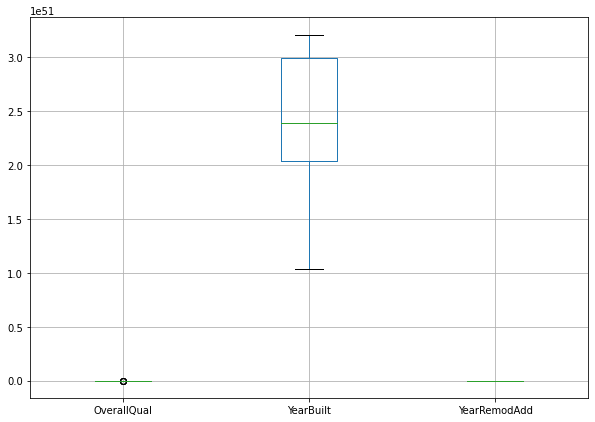

In [ ]:
new_train_feature.boxplot(group_1,figsize=(10,7))

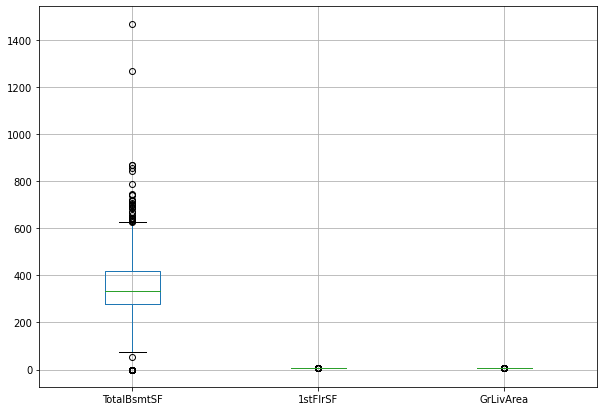

In [ ]:
new_train_feature.boxplot(group_2,figsize=(10,7))

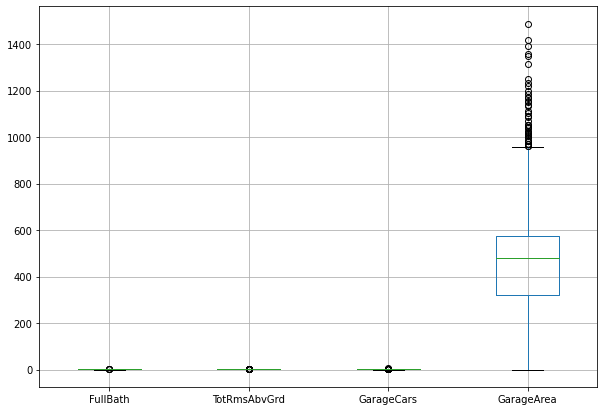

In [ ]:
new_train_feature.boxplot(group_3,figsize=(10,7))

In [ ]:
result = new_feature.values

In [ ]:
new_train_feature.head(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,2ndFlrSF,TotalSF
0,7.0,3.035229e+51,2003,296.832332,5.318379,7.234115,2,2.238462,2.0,548.0,1019.540733,1321.691445
1,6.0,2.444521e+51,1976,407.302419,5.550627,6.947212,2,1.978208,2.0,460.0,0.000000,412.853046
2,7.0,2.987255e+51,2002,314.805061,5.362015,7.275132,2,1.978208,2.0,608.0,1034.306417,1354.473493
3,7.0,1.482566e+51,1970,268.234291,5.388291,7.237969,1,2.116352,3.0,642.0,899.200533,1172.823116
4,8.0,2.963535e+51,2000,376.259367,5.493032,7.470741,2,2.347900,3.0,836.0,1265.167706,1646.920104


In [ ]:
#creating matrices for sklearn:
X = new_train_feature[:train.shape[0]]
test_values = new_train_feature[train.shape[0]:]


In [ ]:
y_train = train['SalePrice']
x_train = new_train_feature[:len(y_train)]
x_test = new_train_feature[len(y_train):]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, random_state=42)

clf = LinearRegression()
#clf= linear_model.Lasso()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score

print("Train acc: " , r2_score(y_train, y_train_pred))
print("Test acc: ", r2_score(y_test, y_pred))

Train acc:  0.3011390191857892
Test acc:  0.3104519402515077


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 47614.23113970722
Mean Squared Error: 4830497264.979128
Root Mean Squared Error: 69501.77886197683


In [ ]:
#Cross validation
from sklearn.model_selection import cross_validate
from sklearn import svm
from sklearn.metrics import make_scorer

cv_results = cross_validate(clf, X, y, cv=10)
sorted(cv_results.keys())
cv_results['test_score']

array([0.40491324, 0.19605529, 0.39570975, 0.32204094, 0.28799954,
       0.27336213, 0.32304572, 0.35496184, 0.18688234, 0.31927809])

In [ ]:
print(cv_results['test_score'].mean())
print(cv_results['test_score'].std())

0.3064248878836815
0.06972618291784506


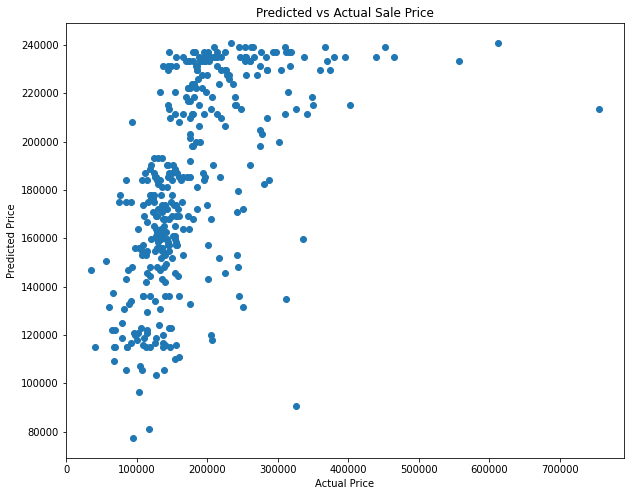

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))


plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title('Predicted vs Actual Sale Price')
fig.savefig('top_corr_iteration',dpi=100)

In [ ]:
final_labels = clf.predict(test_values)

In [ ]:
final_labels

array([162462.13098206, 158441.86555303, 218561.86638489, ...,
       161111.80738986, 209831.07570602, 211551.15150172])

In [ ]:
new_results= pd.DataFrame({'Id':test['Id'],'SalePrice':final_labels})
new_results.to_csv('submission2.csv',index=False)